<a href="https://colab.research.google.com/github/bigirimanainnocent12/Regresion_lineaire/blob/main/code_python_lallemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_excel('/content/Donnees pour estimer la fin de la fermentation.xlsx')
data.drop('Id',axis=1,inplace=True)
data.head()

,Temps,CO2,V,Code
0,0.00,0.000,0.000,F10_2017-06-01
1,0.33,0.000,0.000,F10_2017-06-01
2,0.67,0.018,-0.027,F10_2017-06-01
3,1.00,0.018,0.022,F10_2017-06-01
4,1.33,0.036,0.012,F10_2017-06-01


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temps   1414 non-null   float64
 1   CO2     1414 non-null   float64
 2   V       1414 non-null   float64
 3   Code    1414 non-null   object 
dtypes: float64(3), object(1)
memory usage: 44.3+ KB


# **Statistique descriptive**

In [3]:
data['V'].describe()

,V
count,1414.000000
mean,0.238345
std,0.257386
min,-0.027000
25%,0.027000
50%,0.153000
75%,0.335750
max,1.044000


# ***Graphique v11 et CO2 vs Temps***

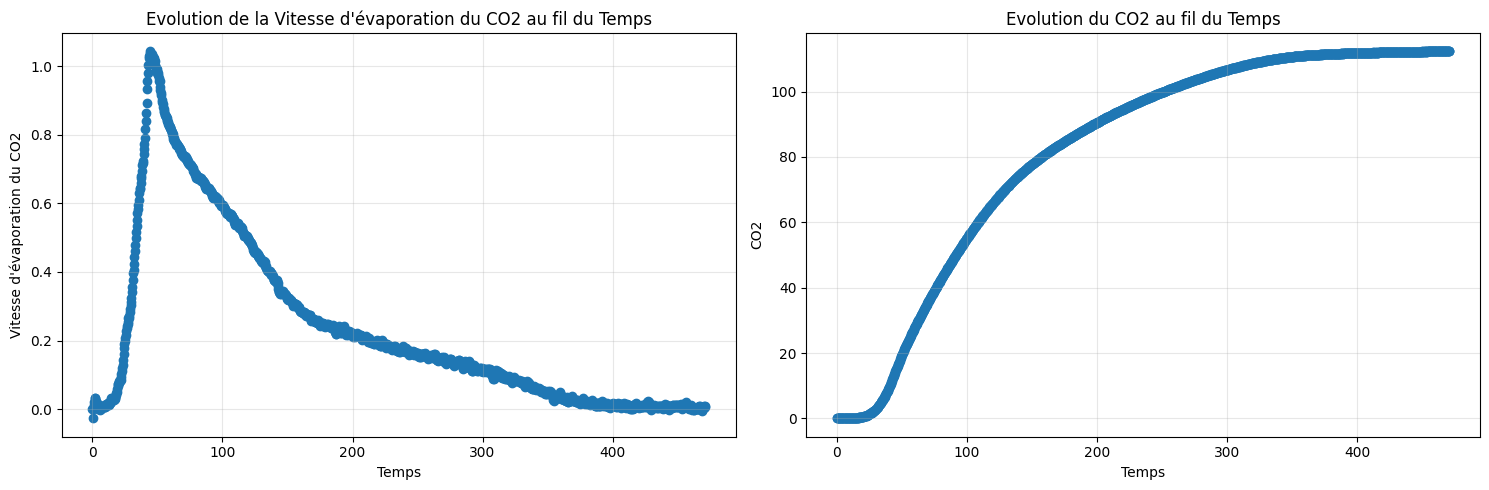

In [4]:
import matplotlib.pyplot as plt

figsize = (15, 5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)


ax1.scatter(data['Temps'], data['V'])
ax1.set_xlabel('Temps')
ax1.set_ylabel("Vitesse d'évaporation du CO2")
ax1.set_title("Evolution de la Vitesse d'évaporation du CO2 au fil du Temps")
ax1.grid(True, alpha=0.3)


ax2.scatter(data['Temps'], data['CO2'])
ax2.set_xlabel('Temps')
ax2.set_ylabel("CO2")
ax2.set_title("Evolution du CO2 au fil du Temps")
ax2.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

In [5]:
maxco2=data['CO2'].max()
maxCO295=maxco2*0.95
maxCO2995=maxco2*0.995

datafiltre=data[(data['CO2']>=maxCO295) & (data['CO2']<=maxCO2995)]
datafiltre=datafiltre.reset_index(drop=True)
datafiltre

,Temps,CO2,V,Code
0,301.33,106.809,0.110,F10_2017-06-01
1,301.67,106.846,0.114,F10_2017-06-01
2,302.00,106.865,0.118,F10_2017-06-01
3,302.33,106.901,0.112,F10_2017-06-01
4,302.67,106.938,0.107,F10_2017-06-01
...,...,...,...,...
292,399.00,111.778,0.014,F10_2017-06-01
293,399.33,111.797,0.012,F10_2017-06-01
294,399.67,111.797,0.011,F10_2017-06-01
295,400.00,111.778,0.015,F10_2017-06-01


# ***Graphique v11 et CO2 vs Temps***

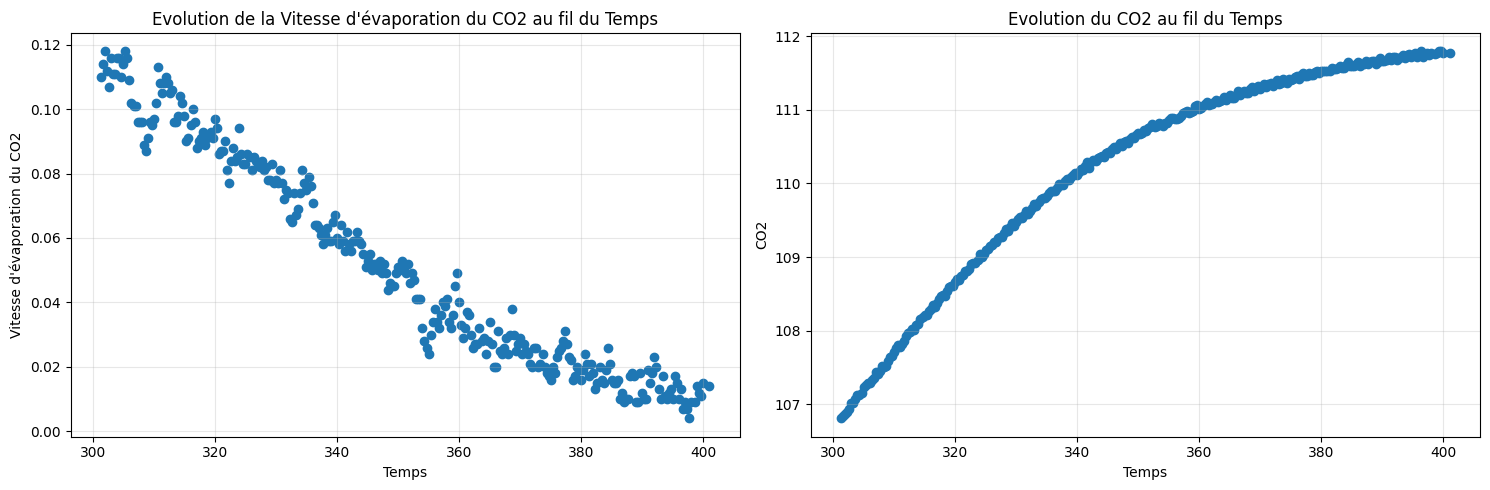

In [6]:
import matplotlib.pyplot as plt

figsize = (15, 5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

ax1.scatter(datafiltre['Temps'], datafiltre['V'])
ax1.set_xlabel('Temps')
ax1.set_ylabel("Vitesse d'évaporation du CO2")
ax1.set_title("Evolution de la Vitesse d'évaporation du CO2 au fil du Temps")
ax1.grid(True, alpha=0.3)

ax2.scatter(datafiltre['Temps'], datafiltre['CO2'])
ax2.set_xlabel('Temps')
ax2.set_ylabel("CO2")
ax2.set_title("Evolution du CO2 au fil du Temps")
ax2.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

# **Régression linéaire entre V11 et Temps**

In [7]:
import statsmodels.formula.api as sm
modele=sm.ols(data=datafiltre,formula='V ~ Temps').fit(cov_type='HC3')
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                      V   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     4580.
Date:                Tue, 17 Jun 2025   Prob (F-statistic):          1.02e-181
Time:                        11:24:29   Log-Likelihood:                 1033.0
No. Observations:                 297   AIC:                            -2062.
Df Residuals:                     295   BIC:                            -2055.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4475      0.006     77.475      0.0

# ***Diagnostic du modèle***

# **Test de Shapiro-Wilk sur les résidus**

In [8]:
from scipy import stats
residu=modele.resid
statistic, pvalue=stats.shapiro(residu)
model={
    "Test":["Shapiro-Wilk"],
    "Statistique":[statistic],
    "Valeur p":[pvalue]
}
pd.DataFrame(model)

,Test,Statistique,Valeur p
0,Shapiro-Wilk,0.995259,0.498952


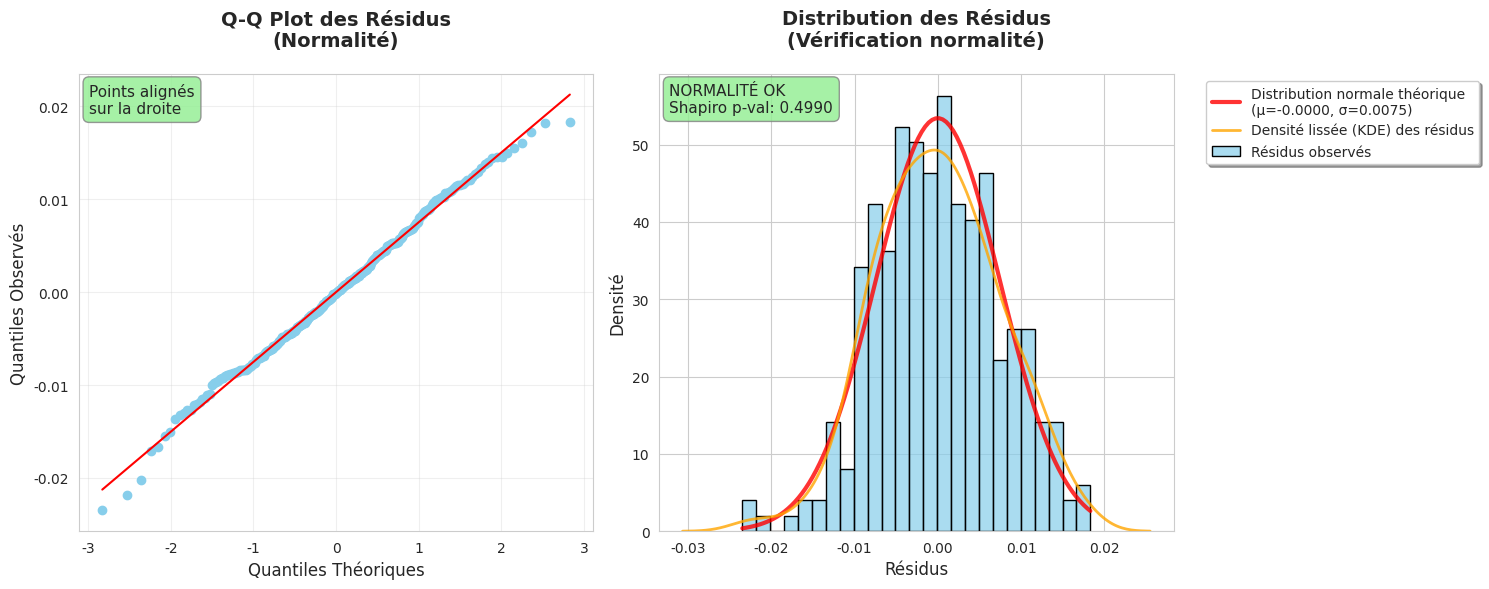

In [9]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Configuration pour les caractères Unicode/emojis avec Seaborn
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Apple Color Emoji']
plt.rcParams['axes.unicode_minus'] = False

# Style Seaborn moderne
sns.set_style("whitegrid")
sns.set_palette("husl")

# Structure 1x2 pour deux graphiques côte à côte
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# =============================================================================
# GRAPHIQUE 1: Q-Q PLOT DES RÉSIDUS (POSITION 0)
# =============================================================================

# Q-Q plot avec scipy pour contrôler les couleurs
from scipy.stats import probplot
probplot(modele.resid, dist="norm", plot=axes[0])

# Changer les couleurs des points et de la ligne
axes[0].get_lines()[0].set_markerfacecolor('skyblue')
axes[0].get_lines()[0].set_markeredgecolor('skyblue')
axes[0].get_lines()[1].set_color('red')

axes[0].set_title('Q-Q Plot des Résidus\n(Normalité)', fontsize=14, fontweight='bold', pad=20)
axes[0].set_xlabel('Quantiles Théoriques', fontsize=12)
axes[0].set_ylabel('Quantiles Observés', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Test de normalité (Shapiro-Wilk)
shapiro_stat, shapiro_pvalue = stats.shapiro(modele.resid)

# Ajout d'une interprétation avec style Seaborn
if shapiro_pvalue > 0.05:
    interpretation_qq = "Points alignés\nsur la droite"
    box_color = "lightgreen"
else:
    interpretation_qq = "Déviations\nnotables"
    box_color = "lightcoral"

axes[0].text(0.02, 0.98, f"{interpretation_qq}",
             transform=axes[0].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color, alpha=0.8, edgecolor='gray'))

# =============================================================================
# GRAPHIQUE 2: DISTRIBUTION DES RÉSIDUS AVEC SEABORN (POSITION 1)
# =============================================================================

# Histogramme avec Seaborn - plus esthétique
sns.histplot(data=modele.resid, bins=25, stat='density', alpha=0.7,
             color='skyblue', edgecolor='black', ax=axes[1],
             label='Résidus observés')

axes[1].set_title('Distribution des Résidus\n(Vérification normalité)',
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_xlabel('Résidus', fontsize=12)
axes[1].set_ylabel('Densité', fontsize=12)

# Superposition de la courbe normale théorique
mu, sigma = np.mean(modele.resid), np.std(modele.resid)
x_norm = np.linspace(modele.resid.min(), modele.resid.max(), 100)
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Ligne de distribution normale avec style Seaborn
axes[1].plot(x_norm, y_norm, color='red', linewidth=3,
             label=f'Distribution normale théorique\n(μ={mu:.4f}, σ={sigma:.4f})', alpha=0.8)

# Ajout optionnel d'une courbe KDE pour les résidus
sns.kdeplot(data=modele.resid, color='orange', linewidth=2,
            alpha=0.8, ax=axes[1], label='Densité lissée (KDE) des résidus')

# Légende positionnée à l'extérieur du graphique (à droite)
axes[1].legend(fontsize=10, frameon=True, fancybox=True, shadow=True,
               bbox_to_anchor=(1.05, 1), loc='upper left')

# Interprétation avec couleurs conditionnelles
if shapiro_pvalue > 0.05:
    interpretation_dist = "NORMALITÉ OK"
    box_color_dist = "lightgreen"
else:
    interpretation_dist = "NON-NORMALITÉ"
    box_color_dist = "lightcoral"

axes[1].text(0.02, 0.98, f"{interpretation_dist}\nShapiro p-val: {shapiro_pvalue:.4f}",
             transform=axes[1].transAxes, fontsize=11,
             verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.4", facecolor=box_color_dist, alpha=0.8, edgecolor='gray'))

# Style final
plt.tight_layout()
plt.savefig('test_normality_seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

# ***TESTS GRAPHIQUES POUR L'HÉTÉROSCÉDASTICITÉ***

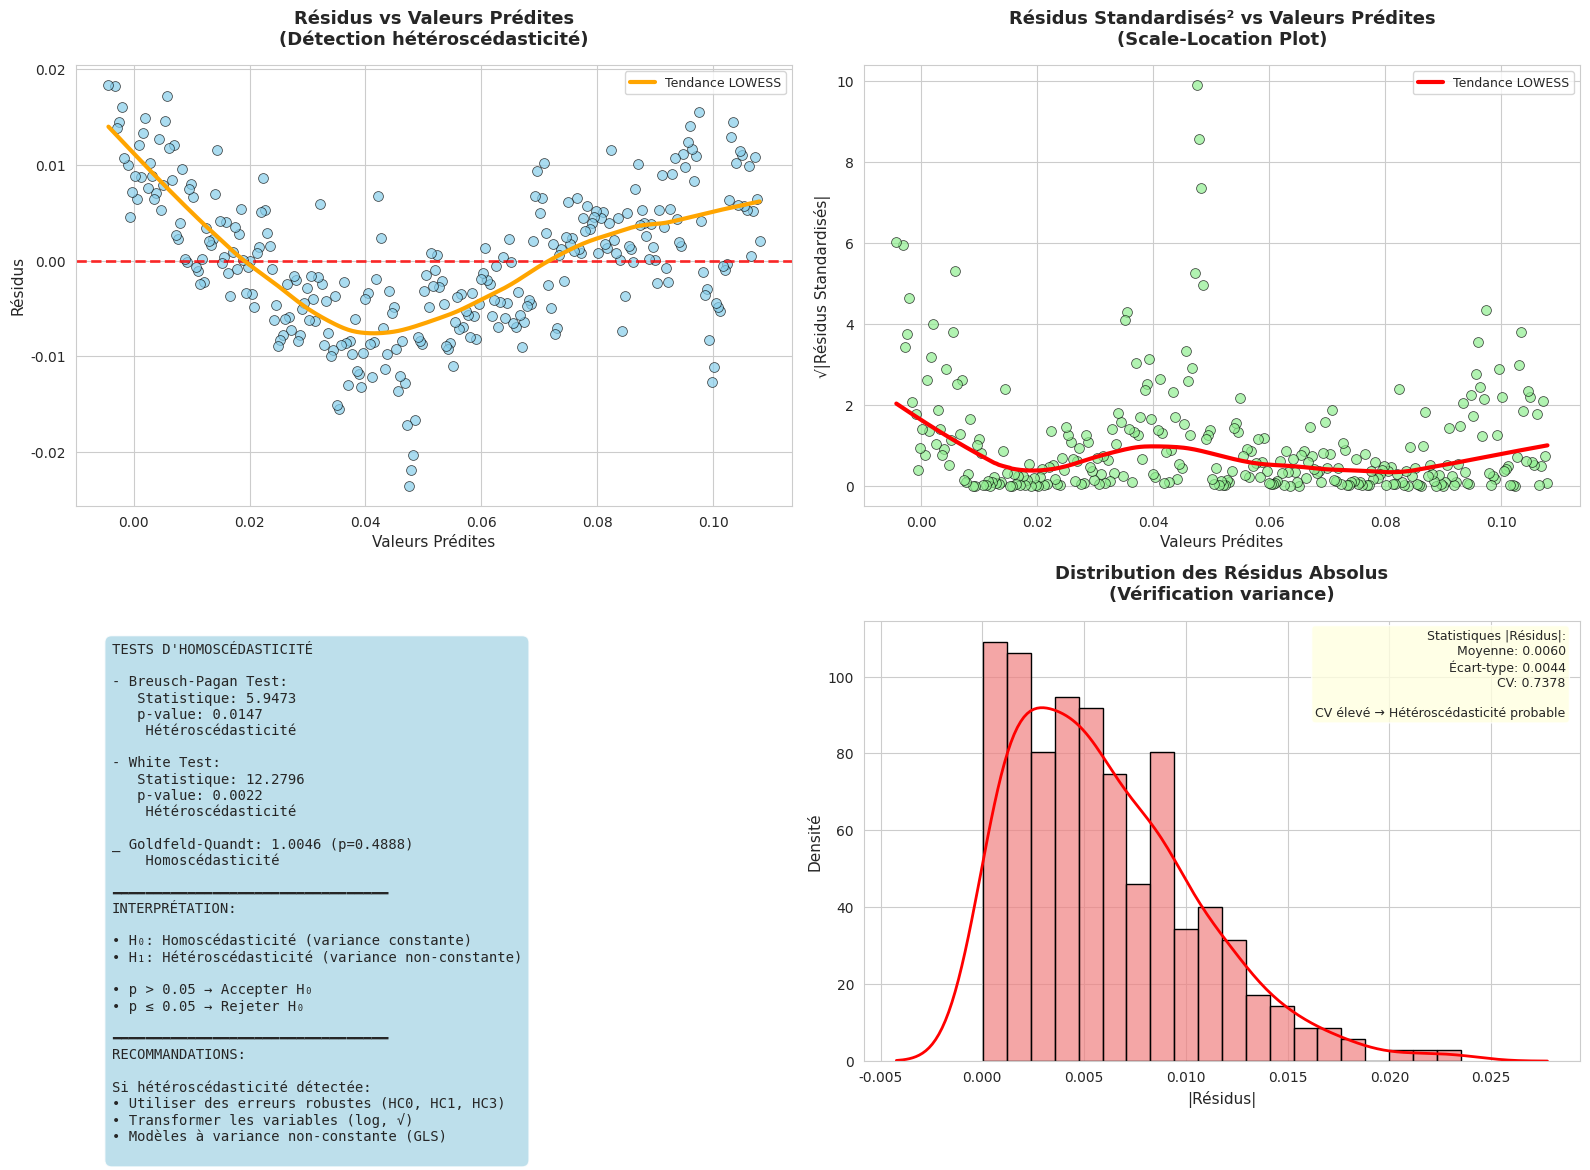


           RÉSUMÉ - TESTS D'HOMOSCÉDASTICITÉ
✓ Breusch-Pagan:  Hétéroscédasticité (p=0.0147)
✓ White Test:  Hétéroscédasticité (p=0.0022)
✓ Goldfeld-Quandt:  Homoscédasticité (p=0.4888)

CONCLUSION: 2/3 tests rejettent l'homoscédasticité
 HÉTÉROSCÉDASTICITÉ DÉTECTÉE - Corrections nécessaires


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, het_goldfeldquandt
from scipy import stats
import pandas as pd

# Configuration pour les caractères Unicode
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Apple Color Emoji']
plt.rcParams['axes.unicode_minus'] = False

# Style Seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

# Structure 2x2 pour quatre tests d'homoscédasticité
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# =============================================================================
# 1. RÉSIDUS VS VALEURS PRÉDITES (Position [0,0])
# =============================================================================

# Calcul des valeurs prédites
y_pred = modele.fittedvalues
residus = modele.resid

# Graphique résidus vs prédictions
sns.scatterplot(x=y_pred, y=residus, alpha=0.7, color='skyblue',
                edgecolor='black', s=50, ax=axes[0,0])

# Ligne horizontale à y=0
axes[0,0].axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.8)

# Ligne de tendance LOWESS pour détecter des patterns
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_result = lowess(residus, y_pred, frac=0.3)
axes[0,0].plot(lowess_result[:, 0], lowess_result[:, 1],
               color='orange', linewidth=3, label='Tendance LOWESS')

axes[0,0].set_title('Résidus vs Valeurs Prédites\n(Détection hétéroscédasticité)',
                    fontsize=13, fontweight='bold', pad=15)
axes[0,0].set_xlabel('Valeurs Prédites', fontsize=11)
axes[0,0].set_ylabel('Résidus', fontsize=11)
axes[0,0].legend(fontsize=9)

# =============================================================================
# 2. RÉSIDUS STANDARDISÉS AU CARRÉ VS VALEURS PRÉDITES (Position [0,1])
# =============================================================================

# Résidus standardisés au carré
residus_std = residus / np.sqrt(np.var(residus))
residus_std_carre = residus_std ** 2

sns.scatterplot(x=y_pred, y=residus_std_carre, alpha=0.7, color='lightgreen',
                edgecolor='black', s=50, ax=axes[0,1])

# Ligne de tendance
lowess_result2 = lowess(residus_std_carre, y_pred, frac=0.3)
axes[0,1].plot(lowess_result2[:, 0], lowess_result2[:, 1],
               color='red', linewidth=3, label='Tendance LOWESS')

axes[0,1].set_title('Résidus Standardisés² vs Valeurs Prédites\n(Scale-Location Plot)',
                    fontsize=13, fontweight='bold', pad=15)
axes[0,1].set_xlabel('Valeurs Prédites', fontsize=11)
axes[0,1].set_ylabel('√|Résidus Standardisés|', fontsize=11)
axes[0,1].legend(fontsize=9)

# =============================================================================
# 3. TESTS STATISTIQUES D'HOMOSCÉDASTICITÉ (Position [1,0])
# =============================================================================

# Préparation des données pour les tests
X = modele.model.exog  # Variables explicatives avec constante
y = modele.model.endog  # Variable dépendante

# Test de Breusch-Pagan
bp_stat, bp_pvalue, bp_f_stat, bp_f_pvalue = het_breuschpagan(residus, X)

# Test de White
white_stat, white_pvalue, white_f_stat, white_f_pvalue = het_white(residus, X)

# Test de Goldfeld-Quandt (divise l'échantillon en deux)
try:
    gq_stat, gq_pvalue, alternative = het_goldfeldquandt(residus, X)
    gq_text = f"Goldfeld-Quandt: {gq_stat:.4f} (p={gq_pvalue:.4f})"
except:
    gq_text = "Goldfeld-Quandt: Non calculable"

# Interprétations
def interpret_test(pvalue, alpha=0.05):
    if pvalue > alpha:
        return " Homoscédasticité"
    else:
        return " Hétéroscédasticité"

bp_interpretation = interpret_test(bp_pvalue)
white_interpretation = interpret_test(white_pvalue)
if 'gq_pvalue' in locals():
    gq_interpretation = interpret_test(gq_pvalue)
else:
    gq_interpretation = "Non calculable"

# Texte des résultats
results_text = f"""TESTS D'HOMOSCÉDASTICITÉ

- Breusch-Pagan Test:
   Statistique: {bp_stat:.4f}
   p-value: {bp_pvalue:.4f}
   {bp_interpretation}

- White Test:
   Statistique: {white_stat:.4f}
   p-value: {white_pvalue:.4f}
   {white_interpretation}

_ {gq_text}
   {gq_interpretation}

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
INTERPRÉTATION:

• H₀: Homoscédasticité (variance constante)
• H₁: Hétéroscédasticité (variance non-constante)

• p > 0.05 → Accepter H₀
• p ≤ 0.05 → Rejeter H₀

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
RECOMMANDATIONS:

Si hétéroscédasticité détectée:
• Utiliser des erreurs robustes (HC0, HC1, HC3)
• Transformer les variables (log, √)
• Modèles à variance non-constante (GLS)
"""

# Affichage du texte
axes[1,0].text(0.05, 0.95, results_text, transform=axes[1,0].transAxes,
               fontsize=10, verticalalignment='top', horizontalalignment='left',
               bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8),
               family='monospace')
axes[1,0].set_xlim(0, 1)
axes[1,0].set_ylim(0, 1)
axes[1,0].axis('off')

# =============================================================================
# 4. HISTOGRAMME DES RÉSIDUS ABSOLUS (Position [1,1])
# =============================================================================

# Distribution des résidus absolus
residus_abs = np.abs(residus)

sns.histplot(data=residus_abs, bins=20, stat='density', alpha=0.7,
             color='lightcoral', edgecolor='black', ax=axes[1,1])

# Courbe KDE
sns.kdeplot(data=residus_abs, color='red', linewidth=2, ax=axes[1,1])

axes[1,1].set_title('Distribution des Résidus Absolus\n(Vérification variance)',
                    fontsize=13, fontweight='bold', pad=15)
axes[1,1].set_xlabel('|Résidus|', fontsize=11)
axes[1,1].set_ylabel('Densité', fontsize=11)

# Statistiques descriptives
mean_abs_resid = np.mean(residus_abs)
std_abs_resid = np.std(residus_abs)
cv_abs_resid = std_abs_resid / mean_abs_resid

stats_text = f"""Statistiques |Résidus|:
Moyenne: {mean_abs_resid:.4f}
Écart-type: {std_abs_resid:.4f}
CV: {cv_abs_resid:.4f}

CV élevé → Hétéroscédasticité probable"""

axes[1,1].text(0.98, 0.98, stats_text, transform=axes[1,1].transAxes,
               fontsize=9, verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow", alpha=0.8))

plt.tight_layout()
plt.savefig('homoscedasticity_tests.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# RÉSUMÉ EXÉCUTIF
# =============================================================================

print("\n" + "="*60)
print("           RÉSUMÉ - TESTS D'HOMOSCÉDASTICITÉ")
print("="*60)
print(f"✓ Breusch-Pagan: {bp_interpretation} (p={bp_pvalue:.4f})")
print(f"✓ White Test: {white_interpretation} (p={white_pvalue:.4f})")
if 'gq_pvalue' in locals():
    print(f"✓ Goldfeld-Quandt: {gq_interpretation} (p={gq_pvalue:.4f})")

# Conclusion générale
nb_rejets = sum([bp_pvalue <= 0.05, white_pvalue <= 0.05])
if 'gq_pvalue' in locals():
    nb_rejets += (gq_pvalue <= 0.05)
    total_tests = 3
else:
    total_tests = 2

print(f"\nCONCLUSION: {nb_rejets}/{total_tests} tests rejettent l'homoscédasticité")

if nb_rejets == 0:
    print(" HOMOSCÉDASTICITÉ CONFIRMÉE - Hypothèse respectée ")
elif nb_rejets <= total_tests/2:
    print("  HOMOSCÉDASTICITÉ DOUTEUSE - Vérifier graphiquement")
else:
    print(" HÉTÉROSCÉDASTICITÉ DÉTECTÉE - Corrections nécessaires")

print("="*60)

# ***Non corrélation des résidus(Indépendances des résidus)***

In [11]:
# Import the function from the correct location
from statsmodels.stats.stattools import durbin_watson

# Calcul de la statistique Durbin-Watson
dw_stat = durbin_watson(modele.resid)
print(f"Statistique Durbin-Watson: {dw_stat:.4f}")

# Interprétation
if 1.5 <= dw_stat <= 2.5:
    print("✅ Pas d'autocorrélation détectée (indépendance des résidus)")
elif dw_stat < 1.5:
    print("⚠️ Autocorrélation positive détectée")
else:
    print("⚠️ Autocorrélation négative détectée")

Statistique Durbin-Watson: 0.3200
⚠️ Autocorrélation positive détectée


❌ Erreur: statsmodels non disponible
🔍 TESTS D'INDÉPENDANCE DES RÉSIDUS
📊 Nombre d'observations: 297

📈 TESTS STATISTIQUES:
----------------------------------------
✓ Durbin-Watson: 0.3200 - Autocorrélation positive
✓ Breusch-Godfrey: p=0.0000 - ⚠️ Autocorrélation
✓ Ljung-Box: p=0.0000 - ⚠️ Autocorrélation
✓ Test des Runs: p=0.0000 - ⚠️ Pattern détecté

📋 TABLEAU RÉCAPITULATIF:
--------------------------------------------------------------------------------
           Test Statistique       p-value             Conclusion                     Interprétation
  Durbin-Watson      0.3200 Voir table DW ⚠️ Dépendance détectée           Autocorrélation positive
Breusch-Godfrey    218.2043        0.0000     ⚠️ Autocorrélation     Autocorrélation jusqu'à 5 lags
      Ljung-Box    681.1436        0.0000     ⚠️ Autocorrélation                    Test sur 5 lags
  Test des Runs    -11.9154        0.0000     ⚠️ Pattern détecté 47 runs observés vs 149.5 attendus


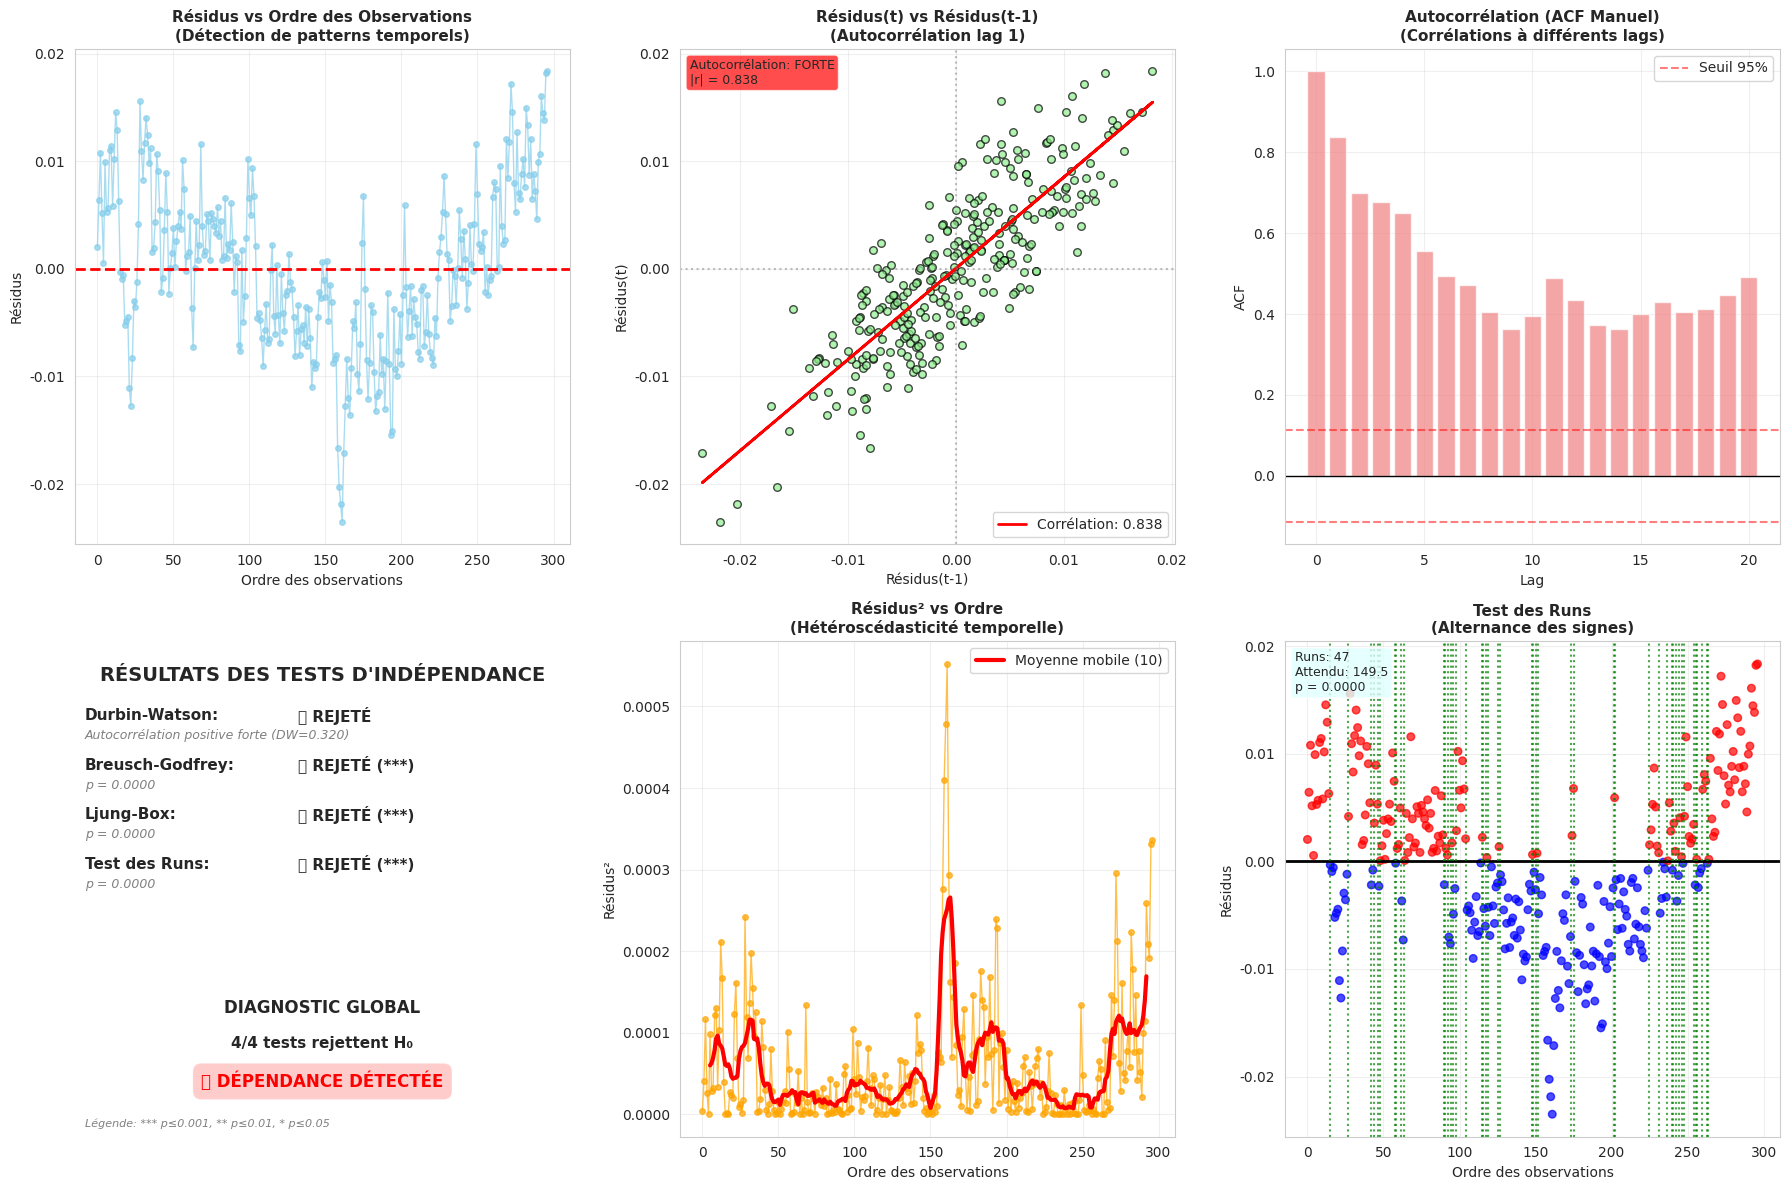


🎯 ANALYSE GLOBALE
📊 RÉSULTATS: 4/4 tests détectent une dépendance

🚨 VIOLATIONS DÉTECTÉES:
   • Durbin-Watson (FORTE): 0.320
   • Breusch-Godfrey (FORTE): p=0.0000
   • Ljung-Box (FORTE): p=0.0000
   • Test Runs (FORTE): p=0.0000

📈 AUTOCORRÉLATION LAG-1: 0.838
   ⚠️ TRÈS FORTE autocorrélation détectée!

🔴 🚨 FORTE DÉPENDANCE DÉTECTÉE
→ Autocorrélation très élevée - corrections URGENTES requises.

💡 RECOMMANDATIONS SELON LE DIAGNOSTIC:

🔴 SI DÉPENDANCE DÉTECTÉE:
   1. ✅ Modèles ARIMA ou SARIMA pour séries temporelles
   2. ✅ Ajout de variables retardées (lags)
   3. ✅ Transformation des données (différenciation)
   4. ✅ Erreurs standard robustes (Newey-West)
   5. ✅ Modèles à effets mixtes si données groupées

🔧 CORRECTIONS TECHNIQUES:
   • Variables omises: Ajouter des prédicteurs manquants
   • Forme fonctionnelle: Tester interactions, polynômes
   • Outliers: Identifier et traiter les valeurs aberrantes
   • Structure temporelle: Modéliser explicitement le temps

📊 VÉRIFICATIONS SUP

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
from scipy import stats

# Gestion des importations et warnings
warnings.filterwarnings('ignore')

try:
    from statsmodels.stats.diagnostic import acorr_breusch_godfrey, acorr_ljungbox
    from statsmodels.tsa.stattools import durbin_watson
    try:
        from statsmodels.tsa.stattools import acf, pacf
        acf_available = True
    except ImportError:
        acf_available = False
    try:
        from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
        tsaplots_available = True
    except ImportError:
        tsaplots_available = False
    statsmodels_available = True
except ImportError:
    print("❌ Erreur: statsmodels non disponible")
    statsmodels_available = False
    acf_available = False
    tsaplots_available = False

# Configuration
plt.rcParams['font.family'] = ['DejaVu Sans', 'Arial Unicode MS', 'Apple Color Emoji']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# =============================================================================
# VÉRIFICATION DE L'EXISTENCE DU MODÈLE
# =============================================================================

try:
    # Vérifier que le modèle existe
    if 'modele' not in locals() and 'modele' not in globals():
        print("❌ Erreur: La variable 'modele' n'existe pas.")
        print("💡 Assurez-vous d'avoir ajusté votre modèle avant d'exécuter ce code.")
        exit()

    # Vérifier que le modèle a les attributs nécessaires
    required_attrs = ['resid', 'fittedvalues', 'model']
    missing_attrs = [attr for attr in required_attrs if not hasattr(modele, attr)]

    if missing_attrs:
        print(f"❌ Erreur: Le modèle manque des attributs: {missing_attrs}")
        exit()

except NameError:
    print("❌ Erreur: La variable 'modele' n'est pas définie.")
    exit()

print("🔍 TESTS D'INDÉPENDANCE DES RÉSIDUS")
print("="*60)

# =============================================================================
# RÉCUPÉRATION DES DONNÉES
# =============================================================================

try:
    residus = modele.resid
    fitted = modele.fittedvalues
    n_obs = len(residus)

    if len(residus) == 0:
        raise ValueError("Données vides")

except Exception as e:
    print(f"❌ Erreur lors de la récupération des données: {e}")
    exit()

print(f"📊 Nombre d'observations: {n_obs}")

# =============================================================================
# TESTS STATISTIQUES D'INDÉPENDANCE
# =============================================================================

print("\n📈 TESTS STATISTIQUES:")
print("-" * 40)

resultats_tests = {
    'Test': [],
    'Statistique': [],
    'p-value': [],
    'Conclusion': [],
    'Interprétation': []
}

# 1. TEST DE DURBIN-WATSON
try:
    dw_stat = durbin_watson(residus)

    # Interprétation du test DW
    if dw_stat < 1.5:
        dw_interpretation = "Autocorrélation positive"
        dw_conclusion = "⚠️ Dépendance détectée"
    elif dw_stat > 2.5:
        dw_interpretation = "Autocorrélation négative"
        dw_conclusion = "⚠️ Dépendance détectée"
    else:
        dw_interpretation = "Pas d'autocorrélation"
        dw_conclusion = "✅ Indépendance"

    resultats_tests['Test'].append('Durbin-Watson')
    resultats_tests['Statistique'].append(f"{dw_stat:.4f}")
    resultats_tests['p-value'].append("Voir table DW")
    resultats_tests['Conclusion'].append(dw_conclusion)
    resultats_tests['Interprétation'].append(dw_interpretation)

    dw_available = True
    print(f"✓ Durbin-Watson: {dw_stat:.4f} - {dw_interpretation}")

except Exception as e:
    print(f"⚠️ Erreur test Durbin-Watson: {e}")
    dw_available = False

# 2. TEST DE BREUSCH-GODFREY (LM TEST)
try:
    # Test avec différents lags
    lags_to_test = min(5, n_obs // 10)  # Maximum 5 lags ou 10% des observations

    bg_stat, bg_pvalue, bg_f_stat, bg_f_pvalue = acorr_breusch_godfrey(modele, nlags=lags_to_test)

    bg_conclusion = "⚠️ Autocorrélation" if bg_pvalue <= 0.05 else "✅ Indépendance"
    bg_interpretation = f"Autocorrélation jusqu'à {lags_to_test} lags"

    resultats_tests['Test'].append('Breusch-Godfrey')
    resultats_tests['Statistique'].append(f"{bg_stat:.4f}")
    resultats_tests['p-value'].append(f"{bg_pvalue:.4f}")
    resultats_tests['Conclusion'].append(bg_conclusion)
    resultats_tests['Interprétation'].append(bg_interpretation)

    bg_available = True
    print(f"✓ Breusch-Godfrey: p={bg_pvalue:.4f} - {bg_conclusion}")

except Exception as e:
    print(f"⚠️ Erreur test Breusch-Godfrey: {e}")
    bg_available = False

# 3. TEST DE LJUNG-BOX
try:
    # Test avec plusieurs lags
    max_lags = min(10, n_obs // 4)
    ljung_result = acorr_ljungbox(residus, lags=max_lags, return_df=True)

    # Prendre le résultat pour 5 lags (ou moins si pas assez d'observations)
    test_lag = min(5, max_lags)
    if test_lag in ljung_result.index:
        ljung_pvalue = ljung_result.loc[test_lag, 'lb_pvalue']
        ljung_stat = ljung_result.loc[test_lag, 'lb_stat']

        ljung_conclusion = "⚠️ Autocorrélation" if ljung_pvalue <= 0.05 else "✅ Indépendance"
        ljung_interpretation = f"Test sur {test_lag} lags"

        resultats_tests['Test'].append('Ljung-Box')
        resultats_tests['Statistique'].append(f"{ljung_stat:.4f}")
        resultats_tests['p-value'].append(f"{ljung_pvalue:.4f}")
        resultats_tests['Conclusion'].append(ljung_conclusion)
        resultats_tests['Interprétation'].append(ljung_interpretation)

        ljung_available = True
        print(f"✓ Ljung-Box: p={ljung_pvalue:.4f} - {ljung_conclusion}")
    else:
        ljung_available = False
        print("⚠️ Ljung-Box: Pas assez d'observations")

except Exception as e:
    print(f"⚠️ Erreur test Ljung-Box: {e}")
    ljung_available = False

# 4. TEST DE RUNS (Test des signes)
try:
    # Test des runs pour détecter des patterns dans les résidus
    residus_signs = np.where(residus > 0, 1, 0)
    runs, n1, n2 = 0, 0, 0

    # Compter les runs
    for i in range(len(residus_signs)):
        if residus_signs[i] == 1:
            n1 += 1
        else:
            n2 += 1

        if i == 0 or residus_signs[i] != residus_signs[i-1]:
            runs += 1

    # Statistique du test
    runs_expected = (2 * n1 * n2) / (n1 + n2) + 1
    runs_variance = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2)**2 * (n1 + n2 - 1))

    if runs_variance > 0:
        z_runs = (runs - runs_expected) / np.sqrt(runs_variance)
        runs_pvalue = 2 * (1 - stats.norm.cdf(abs(z_runs)))

        runs_conclusion = "⚠️ Pattern détecté" if runs_pvalue <= 0.05 else "✅ Aléatoire"
        runs_interpretation = f"{runs} runs observés vs {runs_expected:.1f} attendus"

        resultats_tests['Test'].append('Test des Runs')
        resultats_tests['Statistique'].append(f"{z_runs:.4f}")
        resultats_tests['p-value'].append(f"{runs_pvalue:.4f}")
        resultats_tests['Conclusion'].append(runs_conclusion)
        resultats_tests['Interprétation'].append(runs_interpretation)

        runs_available = True
        print(f"✓ Test des Runs: p={runs_pvalue:.4f} - {runs_conclusion}")
    else:
        runs_available = False
        print("⚠️ Test des Runs: Variance nulle")

except Exception as e:
    print(f"⚠️ Erreur test des Runs: {e}")
    runs_available = False

# Affichage du tableau récapitulatif
if resultats_tests['Test']:
    df_tests = pd.DataFrame(resultats_tests)
    print(f"\n📋 TABLEAU RÉCAPITULATIF:")
    print("-" * 80)
    print(df_tests.to_string(index=False))

# =============================================================================
# GRAPHIQUES DIAGNOSTIQUES
# =============================================================================

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Résidus vs Ordre des observations
axes[0,0].plot(range(len(residus)), residus, 'o-', alpha=0.7, color='skyblue',
               markersize=4, linewidth=1)
axes[0,0].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0,0].set_title('Résidus vs Ordre des Observations\n(Détection de patterns temporels)',
                    fontweight='bold', fontsize=11)
axes[0,0].set_xlabel('Ordre des observations')
axes[0,0].set_ylabel('Résidus')
axes[0,0].grid(True, alpha=0.3)

# 2. Résidus vs Résidus décalés (lag 1)
if len(residus) > 1:
    residus_lag1 = residus[:-1]
    residus_current = residus[1:]

    axes[0,1].scatter(residus_lag1, residus_current, alpha=0.7, color='lightgreen',
                      edgecolor='black', s=30)

    # Ligne de corrélation
    try:
        correlation = np.corrcoef(residus_lag1, residus_current)[0,1]
        m, b = np.polyfit(residus_lag1, residus_current, 1)
        axes[0,1].plot(residus_lag1, m*residus_lag1 + b, 'r-', linewidth=2,
                       label=f'Corrélation: {correlation:.3f}')

        # Interprétation de la corrélation
        if abs(correlation) > 0.7:
            corr_level = "FORTE"
            corr_color = "red"
        elif abs(correlation) > 0.3:
            corr_level = "MODÉRÉE"
            corr_color = "orange"
        else:
            corr_level = "FAIBLE"
            corr_color = "green"

        axes[0,1].text(0.02, 0.98, f"Autocorrélation: {corr_level}\n|r| = {abs(correlation):.3f}",
                       transform=axes[0,1].transAxes, fontsize=9,
                       verticalalignment='top',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor=corr_color, alpha=0.7))

        axes[0,1].legend()
    except:
        pass

    # Ligne de référence (indépendance parfaite)
    axes[0,1].axhline(y=0, color='gray', linestyle=':', alpha=0.5)
    axes[0,1].axvline(x=0, color='gray', linestyle=':', alpha=0.5)

    axes[0,1].set_title('Résidus(t) vs Résidus(t-1)\n(Autocorrélation lag 1)',
                        fontweight='bold', fontsize=11)
    axes[0,1].set_xlabel('Résidus(t-1)')
    axes[0,1].set_ylabel('Résidus(t)')
    axes[0,1].grid(True, alpha=0.3)

# 3. Fonction d'autocorrélation (ACF)
if acf_available:
    try:
        max_lags_acf = min(20, len(residus)//4)
        acf_values, acf_confint = acf(residus, nlags=max_lags_acf, alpha=0.05)

        lags = range(len(acf_values))
        axes[0,2].bar(lags, acf_values, alpha=0.7, color='lightcoral')

        # Intervalles de confiance
        conf_lower = acf_confint[:, 0] - acf_values
        conf_upper = acf_confint[:, 1] - acf_values
        axes[0,2].errorbar(lags, acf_values, yerr=[abs(conf_lower), conf_upper],
                           fmt='none', color='black', alpha=0.5)

        axes[0,2].axhline(y=0, color='black', linestyle='-', linewidth=1)
        axes[0,2].set_title('Fonction d\'Autocorrélation (ACF)\n(Corrélations à différents lags)',
                            fontweight='bold', fontsize=11)
        axes[0,2].set_xlabel('Lag')
        axes[0,2].set_ylabel('ACF')
        axes[0,2].grid(True, alpha=0.3)

        # Identifier les lags significatifs
        significant_lags = []
        for i, (acf_val, conf_int) in enumerate(zip(acf_values[1:], acf_confint[1:]), 1):
            if acf_val < conf_int[0] or acf_val > conf_int[1]:
                significant_lags.append(i)

        if significant_lags:
            axes[0,2].text(0.02, 0.98, f"Lags significatifs: {significant_lags[:5]}",
                           transform=axes[0,2].transAxes, fontsize=9,
                           verticalalignment='top',
                           bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral", alpha=0.8))

    except Exception as e:
        axes[0,2].text(0.5, 0.5, f'Erreur calcul ACF:\n{str(e)[:50]}...',
                       ha='center', va='center', transform=axes[0,2].transAxes,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
else:
    # ACF manuelle si statsmodels.tsa.stattools.acf non disponible
    try:
        max_lags_acf = min(20, len(residus)//4)
        acf_manual = []

        for lag in range(max_lags_acf + 1):
            if lag == 0:
                acf_manual.append(1.0)
            else:
                if lag < len(residus):
                    corr = np.corrcoef(residus[:-lag], residus[lag:])[0,1]
                    acf_manual.append(corr if not np.isnan(corr) else 0)
                else:
                    acf_manual.append(0)

        lags = range(len(acf_manual))
        axes[0,2].bar(lags, acf_manual, alpha=0.7, color='lightcoral')

        # Ligne de confiance approximative
        conf_level = 1.96 / np.sqrt(len(residus))
        axes[0,2].axhline(y=conf_level, color='red', linestyle='--', alpha=0.5, label='Seuil 95%')
        axes[0,2].axhline(y=-conf_level, color='red', linestyle='--', alpha=0.5)

        axes[0,2].axhline(y=0, color='black', linestyle='-', linewidth=1)
        axes[0,2].set_title('Autocorrélation (ACF Manuel)\n(Corrélations à différents lags)',
                            fontweight='bold', fontsize=11)
        axes[0,2].set_xlabel('Lag')
        axes[0,2].set_ylabel('ACF')
        axes[0,2].legend()
        axes[0,2].grid(True, alpha=0.3)

    except Exception as e:
        axes[0,2].text(0.5, 0.5, f'Erreur ACF manuel:\n{str(e)[:50]}...',
                       ha='center', va='center', transform=axes[0,2].transAxes,
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# 4. Tableau des résultats des tests au lieu du graphique outliers
try:
    # Créer un tableau visuel des résultats
    axes[1,0].axis('off')  # Désactiver les axes

    # Titre
    axes[1,0].text(0.5, 0.95, 'RÉSULTATS DES TESTS D\'INDÉPENDANCE',
                   ha='center', va='top', transform=axes[1,0].transAxes,
                   fontsize=14, fontweight='bold')

    # Préparer les données du tableau
    y_positions = [0.85, 0.75, 0.65, 0.55, 0.45]
    test_results = []

    # Durbin-Watson
    if dw_available:
        if dw_stat < 1.5:
            dw_status = "🔴 REJETÉ"
            dw_interp = f"Autocorrélation positive forte (DW={dw_stat:.3f})"
        elif dw_stat > 2.5:
            dw_status = "🔴 REJETÉ"
            dw_interp = f"Autocorrélation négative (DW={dw_stat:.3f})"
        else:
            dw_status = "✅ ACCEPTÉ"
            dw_interp = f"Pas d'autocorrélation (DW={dw_stat:.3f})"
        test_results.append(("Durbin-Watson", dw_status, dw_interp))

    # Breusch-Godfrey
    if bg_available:
        if bg_pvalue <= 0.001:
            bg_status = "🔴 REJETÉ (***)"
        elif bg_pvalue <= 0.01:
            bg_status = "🔴 REJETÉ (**)"
        elif bg_pvalue <= 0.05:
            bg_status = "🟡 REJETÉ (*)"
        else:
            bg_status = "✅ ACCEPTÉ"
        test_results.append(("Breusch-Godfrey", bg_status, f"p = {bg_pvalue:.4f}"))

    # Ljung-Box
    if ljung_available:
        if ljung_pvalue <= 0.001:
            ljung_status = "🔴 REJETÉ (***)"
        elif ljung_pvalue <= 0.01:
            ljung_status = "🔴 REJETÉ (**)"
        elif ljung_pvalue <= 0.05:
            ljung_status = "🟡 REJETÉ (*)"
        else:
            ljung_status = "✅ ACCEPTÉ"
        test_results.append(("Ljung-Box", ljung_status, f"p = {ljung_pvalue:.4f}"))

    # Test des Runs
    if runs_available:
        if runs_pvalue <= 0.001:
            runs_status = "🔴 REJETÉ (***)"
        elif runs_pvalue <= 0.01:
            runs_status = "🔴 REJETÉ (**)"
        elif runs_pvalue <= 0.05:
            runs_status = "🟡 REJETÉ (*)"
        else:
            runs_status = "✅ ACCEPTÉ"
        test_results.append(("Test des Runs", runs_status, f"p = {runs_pvalue:.4f}"))

    # Afficher les résultats
    for i, (test_name, status, details) in enumerate(test_results[:5]):
        y_pos = y_positions[i]

        # Nom du test
        axes[1,0].text(0.02, y_pos, f"{test_name}:",
                       transform=axes[1,0].transAxes, fontsize=11,
                       fontweight='bold', va='center')

        # Statut
        axes[1,0].text(0.45, y_pos, status,
                       transform=axes[1,0].transAxes, fontsize=11,
                       va='center', fontweight='bold')

        # Détails
        axes[1,0].text(0.02, y_pos-0.04, details,
                       transform=axes[1,0].transAxes, fontsize=9,
                       va='center', style='italic', color='gray')

    # Résumé global
    violations_summary = f"{violations}/{total_tests} tests rejettent H₀"
    if violations == 0:
        global_status = "✅ INDÉPENDANCE CONFIRMÉE"
        global_color = "green"
    elif violations <= total_tests // 2:
        global_status = "⚠️ INDÉPENDANCE DOUTEUSE"
        global_color = "orange"
    else:
        global_status = "🚨 DÉPENDANCE DÉTECTÉE"
        global_color = "red"

    axes[1,0].text(0.5, 0.25, "DIAGNOSTIC GLOBAL",
                   ha='center', transform=axes[1,0].transAxes,
                   fontsize=12, fontweight='bold')

    axes[1,0].text(0.5, 0.18, violations_summary,
                   ha='center', transform=axes[1,0].transAxes,
                   fontsize=11, fontweight='bold')

    axes[1,0].text(0.5, 0.10, global_status,
                   ha='center', transform=axes[1,0].transAxes,
                   fontsize=12, fontweight='bold', color=global_color,
                   bbox=dict(boxstyle="round,pad=0.5", facecolor=global_color, alpha=0.2))

    # Légende des symboles
    axes[1,0].text(0.02, 0.02, "Légende: *** p≤0.001, ** p≤0.01, * p≤0.05",
                   transform=axes[1,0].transAxes, fontsize=8,
                   style='italic', color='gray')

except Exception as e:
    axes[1,0].text(0.5, 0.5, f'Erreur affichage résultats:\n{str(e)[:50]}...',
                   ha='center', va='center', transform=axes[1,0].transAxes,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# 5. Résidus au carré vs Ordre (hétéroscédasticité temporelle)
residus_carre = residus ** 2
axes[1,1].plot(range(len(residus_carre)), residus_carre, 'o-', alpha=0.7,
               color='orange', markersize=4, linewidth=1)

# Moyenne mobile
window_size = min(10, len(residus_carre)//5)
if window_size > 0:
    moving_avg = pd.Series(residus_carre).rolling(window=window_size, center=True).mean()
    axes[1,1].plot(range(len(moving_avg)), moving_avg, 'r-', linewidth=3,
                   label=f'Moyenne mobile ({window_size})')
    axes[1,1].legend()

axes[1,1].set_title('Résidus² vs Ordre\n(Hétéroscédasticité temporelle)',
                    fontweight='bold', fontsize=11)
axes[1,1].set_xlabel('Ordre des observations')
axes[1,1].set_ylabel('Résidus²')
axes[1,1].grid(True, alpha=0.3)

# 6. Graphique des runs
try:
    residus_signs = np.where(residus > 0, 1, -1)
    colors = ['red' if x > 0 else 'blue' for x in residus]

    axes[1,2].scatter(range(len(residus)), residus, c=colors, alpha=0.7, s=30)
    axes[1,2].axhline(y=0, color='black', linestyle='-', linewidth=2)

    # Marquer les changements de signe
    for i in range(1, len(residus_signs)):
        if residus_signs[i] != residus_signs[i-1]:
            axes[1,2].axvline(x=i-0.5, color='green', linestyle=':', alpha=0.7)

    if runs_available:
        axes[1,2].text(0.02, 0.98, f"Runs: {runs}\nAttendu: {runs_expected:.1f}\np = {runs_pvalue:.4f}",
                       transform=axes[1,2].transAxes, fontsize=9,
                       verticalalignment='top',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcyan", alpha=0.8))

    axes[1,2].set_title('Test des Runs\n(Alternance des signes)',
                        fontweight='bold', fontsize=11)
    axes[1,2].set_xlabel('Ordre des observations')
    axes[1,2].set_ylabel('Résidus')
    axes[1,2].grid(True, alpha=0.3)

except Exception as e:
    axes[1,2].text(0.5, 0.5, f'Erreur Runs:\n{str(e)[:50]}',
                   ha='center', va='center', transform=axes[1,2].transAxes,
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

plt.tight_layout()
plt.savefig('residuals_independence_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# ANALYSE ET RECOMMANDATIONS
# =============================================================================

print(f"\n🎯 ANALYSE GLOBALE")
print("="*60)

# Compter les violations avec pondération
violations = 0
total_tests = 0
violation_details = []

if dw_available:
    total_tests += 1
    if dw_stat < 1.5 or dw_stat > 2.5:
        violations += 1
        severity = "FORTE" if dw_stat < 1.0 or dw_stat > 3.0 else "MODÉRÉE"
        violation_details.append(f"Durbin-Watson ({severity}): {dw_stat:.3f}")

if bg_available:
    total_tests += 1
    if bg_pvalue <= 0.05:
        violations += 1
        severity = "FORTE" if bg_pvalue <= 0.001 else "MODÉRÉE"
        violation_details.append(f"Breusch-Godfrey ({severity}): p={bg_pvalue:.4f}")

if ljung_available:
    total_tests += 1
    if ljung_pvalue <= 0.05:
        violations += 1
        severity = "FORTE" if ljung_pvalue <= 0.001 else "MODÉRÉE"
        violation_details.append(f"Ljung-Box ({severity}): p={ljung_pvalue:.4f}")

if runs_available:
    total_tests += 1
    if runs_pvalue <= 0.05:
        violations += 1
        severity = "FORTE" if runs_pvalue <= 0.001 else "MODÉRÉE"
        violation_details.append(f"Test Runs ({severity}): p={runs_pvalue:.4f}")

# Calculer la corrélation lag-1 si disponible
correlation_lag1 = None
if len(residus) > 1:
    try:
        residus_lag1 = residus[:-1]
        residus_current = residus[1:]
        correlation_lag1 = np.corrcoef(residus_lag1, residus_current)[0,1]
    except:
        pass

print(f"📊 RÉSULTATS: {violations}/{total_tests} tests détectent une dépendance")

if violation_details:
    print(f"\n🚨 VIOLATIONS DÉTECTÉES:")
    for detail in violation_details:
        print(f"   • {detail}")

if correlation_lag1 is not None:
    print(f"\n📈 AUTOCORRÉLATION LAG-1: {correlation_lag1:.3f}")
    if abs(correlation_lag1) > 0.7:
        print(f"   ⚠️ TRÈS FORTE autocorrélation détectée!")
    elif abs(correlation_lag1) > 0.3:
        print(f"   ⚠️ Autocorrélation modérée détectée")

if violations == 0:
    diagnostic = "✅ INDÉPENDANCE CONFIRMÉE"
    recommandation = "Les résidus semblent indépendants. Aucune correction nécessaire."
    color = "🟢"
elif violations <= total_tests // 2:
    diagnostic = "⚠️ INDÉPENDANCE DOUTEUSE"
    recommandation = "Quelques signes de dépendance. Vérifications recommandées."
    color = "🟡"
else:
    diagnostic = "🚨 DÉPENDANCE DÉTECTÉE"
    recommandation = "Corrections nécessaires pour traiter l'autocorrélation."
    color = "🔴"

# Surclasser le diagnostic si corrélation très forte
if correlation_lag1 is not None and abs(correlation_lag1) > 0.7:
    diagnostic = "🚨 FORTE DÉPENDANCE DÉTECTÉE"
    recommandation = "Autocorrélation très élevée - corrections URGENTES requises."
    color = "🔴"

print(f"\n{color} {diagnostic}")
print(f"→ {recommandation}")

print(f"""
💡 RECOMMANDATIONS SELON LE DIAGNOSTIC:

{color} SI DÉPENDANCE DÉTECTÉE:
   1. ✅ Modèles ARIMA ou SARIMA pour séries temporelles
   2. ✅ Ajout de variables retardées (lags)
   3. ✅ Transformation des données (différenciation)
   4. ✅ Erreurs standard robustes (Newey-West)
   5. ✅ Modèles à effets mixtes si données groupées

🔧 CORRECTIONS TECHNIQUES:
   • Variables omises: Ajouter des prédicteurs manquants
   • Forme fonctionnelle: Tester interactions, polynômes
   • Outliers: Identifier et traiter les valeurs aberrantes
   • Structure temporelle: Modéliser explicitement le temps

📊 VÉRIFICATIONS SUPPLÉMENTAIRES:
   • Graphiques des résidus par groupes/périodes
   • Tests de stabilité structurelle
   • Analyse des résidus standardisés

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
🎯 CONCLUSION:

La non-corrélation des résidus est fondamentale pour la validité
des tests statistiques. Si violation détectée, corriger avant
l'interprétation des résultats.
""")

print("="*60)

# Code exemple si corrections nécessaires
if violations > 0:
    print("\n💻 CODE POUR CORRIGER RÉGRESSION LINÉAIRE:")
    print("-"*50)

    if correlation_lag1 is not None and abs(correlation_lag1) > 0.7:
        print(f"""
# AUTOCORRÉLATION CRITIQUE EN RÉGRESSION LINÉAIRE - Solutions prioritaires:

# 1. ERREURS ROBUSTES HAC (Newey-West) - OBLIGATOIRE
import statsmodels.api as sm
modele_robust = sm.OLS(y, X).fit(cov_type='HAC',
                                cov_kwds={{'maxlags': {min(5, len(residus)//10)}
                                         }})
print("MODÈLE AVEC ERREURS ROBUSTES:")
print(modele_robust.summary())

# 2. DIAGNOSTIC SPÉCIFICATION - Identifier variables omises
from statsmodels.stats.diagnostic import linear_reset

# Test RESET pour forme fonctionnelle
reset_stat, reset_pvalue, reset_f_pvalue = linear_reset(modele, power=2)
print(f"Test RESET p-value: {{reset_pvalue:.4f}}")
if reset_pvalue < 0.05:
    print("⚠️ SPÉCIFICATION INCORRECTE - Ajouter interactions/polynômes")

# 3. VARIABLES DE CONTRÔLE TEMPOREL (si données temporelles)
import numpy as np
n_obs = len(y)
time_trend = np.arange(1, n_obs + 1)
time_trend2 = time_trend ** 2

# Ajouter trend linéaire et quadratique
X_with_time = sm.add_constant(np.column_stack([
    X[:, 1:],  # Variables originales (sans constante)
    time_trend,
    time_trend2
]))

modele_time = sm.OLS(y, X_with_time).fit(cov_type='HAC',
                                        cov_kwds={{'maxlags': {min(5, len(residus)//10)}
                                                 }})
print("\\nMODÈLE AVEC CONTRÔLES TEMPORELS:")
print(modele_time.summary())

# 4. TEST D'AMÉLIORATION
nouveau_dw = durbin_watson(modele_time.resid)
print(f"\\nNouveau Durbin-Watson: {{nouveau_dw:.4f}}")
print(f"Amélioration: {{nouveau_dw - {dw_stat if dw_available else 'dw_stat'}:.4f}}")
""")
    else:
        print(f"""
# AUTOCORRÉLATION MODÉRÉE - Solutions pour régression linéaire:

# 1. ERREURS ROBUSTES HAC (précaution standard)
import statsmodels.api as sm
modele_robust = sm.OLS(y, X).fit(cov_type='HAC',
                                cov_kwds={{'maxlags': {min(5, len(residus)//10)}
                                         }})

# 2. TESTS DE SPÉCIFICATION
from statsmodels.stats.diagnostic import linear_reset, het_white

# Test variables omises (RESET)
reset_stat, reset_pvalue, _ = linear_reset(modele, power=2)
print(f"Test RESET (spécification): p={{reset_pvalue:.4f}}")

# Test hétéroscédasticité
white_stat, white_pvalue, _, _ = het_white(modele.resid, modele.model.exog)
print(f"Test White (hétéroscédasticité): p={{white_pvalue:.4f}}")

# 3. VARIABLES DE CONTRÔLE si approprié
# (ajouter selon le contexte: temps, groupes, régions)

print("\\nMODÈLE AVEC ERREURS ROBUSTES:")
print(modele_robust.summary())
""")

    print(f"""
# 5. VALIDATION DES CORRECTIONS
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# Tester le modèle corrigé
try:
    bg_stat_new, bg_pvalue_new, _, _ = acorr_breusch_godfrey(modele_robust, nlags=5)
    print(f"\\nNouveau Breusch-Godfrey p-value: {{bg_pvalue_new:.4f}}")

    if bg_pvalue_new > 0.05:
        print("✅ Autocorrélation corrigée avec succès!")
    else:
        print("⚠️ Autocorrélation persiste - diagnostic plus approfondi requis")

    # Comparer les erreurs standard
    print("\\n📊 COMPARAISON ERREURS STANDARD:")
    print("Modèle original vs Robuste:")
    for i, var_name in enumerate(modele.model.exog_names):
        err_orig = modele.bse[i]
        err_robust = modele_robust.bse[i]
        ratio = err_robust / err_orig
        print(f"{{var_name}}: {{err_orig:.4f}} → {{err_robust:.4f}} (×{{ratio:.2f}})")

except Exception as e:
    print(f"Erreur validation: {{e}}")

# 6. RECOMMANDATIONS ADDITIONNELLES
print(\"\"\"
🎯 PROCHAINES ÉTAPES RECOMMANDÉES:

1. Utiliser TOUJOURS les erreurs robustes HAC pour l'inférence
2. Investiguer variables omises potentielles:
   - Trends temporels (linéaire, quadratique, saisonnier)
   - Variables de contexte (économiques, sectorielles)
   - Interactions entre variables existantes
   - Variables retardées des prédicteurs (si temporel)

3. Tests de robustesse:
   - Sous-échantillons temporels
   - Exclusion d'outliers
   - Spécifications alternatives

4. Si autocorrélation persiste malgré corrections:
   → Considérer modèle panel ou effets mixtes
   → Modèle de régression avec erreurs AR(1)
   → Collecte de données additionnelles
\"\"\")""")

# ***modèle de regression***

y=0.4475-0.0011X

- y=la vitesse d'évaporation du C02

- x=Le temps

La fin de la fermentation sera estimé

In [18]:
0.4475/0.0011

406.8181818181818